## Import Libraries

In [124]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [125]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
pd.set_option("display.max_columns",None)

## Data Loading

In [126]:
os.listdir()

['.config',
 'SVM_model_Child.pkl',
 'RF_model_Child.pkl',
 'Child.csv',
 'Toddler.csv',
 'ANN_model_Child.h5',
 'sample_data']

In [127]:
df=pd.read_csv(filepath_or_buffer="Child.csv")

In [128]:
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,0,6,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [129]:
print(df.shape)

(1168, 22)


## Data Preprocessing

In [130]:
print(df.columns)

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


***dropping unwanted columns***

In [131]:
df=df.drop(labels=["id","ethnicity","contry_of_res","used_app_before","austim","age_desc"],axis=1)

In [132]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6,m,no,5,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,no,5,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,no,5,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,yes,4,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,yes,10,Parent,YES


***renaming the columns***

In [133]:
df=df.rename(columns={"Class/ASD":"Class"})

In [134]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation,Class
0,1,1,0,0,1,1,0,1,0,0,6,m,no,5,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,no,5,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,no,5,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,yes,4,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,yes,10,Parent,YES


***Visualizing Age Column***

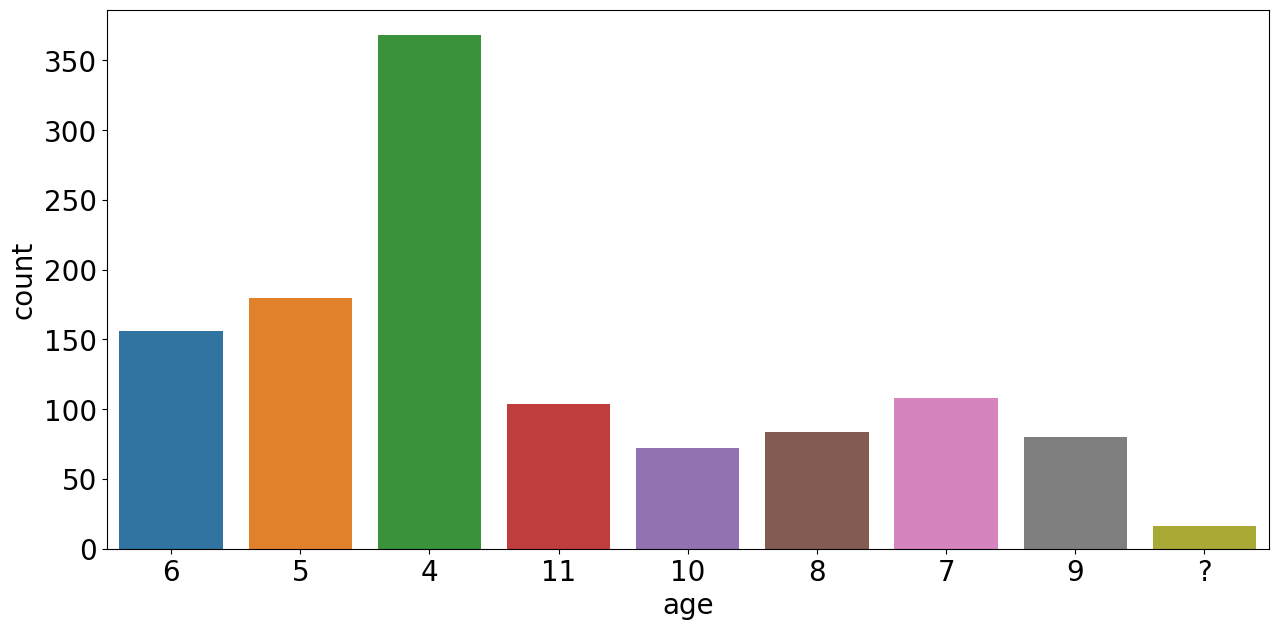

In [135]:
plt.figure(figsize=(15,7))
plt.rcParams["font.size"]=20
sns.countplot(x="age",data=df)
plt.show()

***Visualizing gender Column***

In [136]:
df["gender"].value_counts()

m    832
f    336
Name: gender, dtype: int64

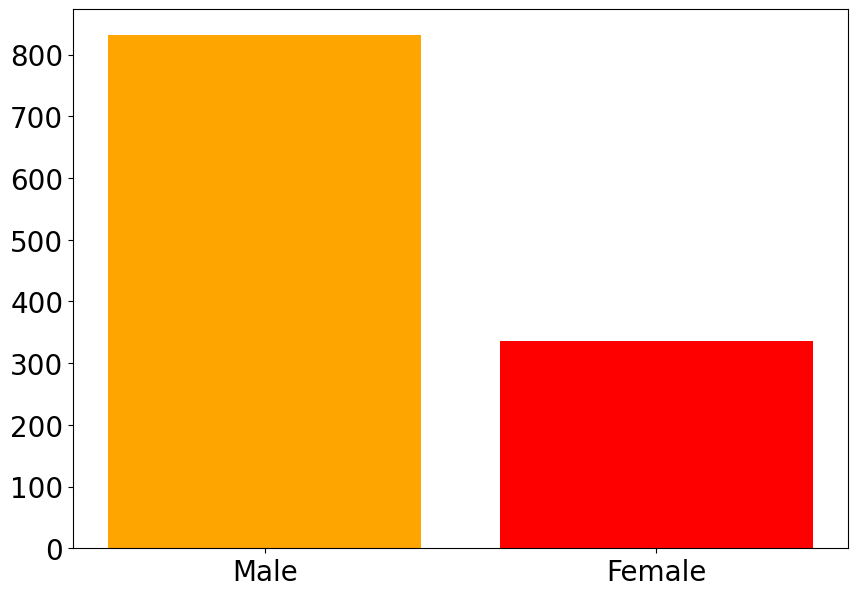

In [137]:
plt.figure(figsize=(10,7))
plt.rcParams["font.size"]=20
plt.bar(x=["Male","Female"],height=df["gender"].value_counts(),color=["orange","red"])
plt.show()

In [138]:
df["gender"].replace(to_replace=["m","f"],value=[0,1],inplace=True)

In [139]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation,Class
0,1,1,0,0,1,1,0,1,0,0,6,0,no,5,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,0,no,5,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,0,no,5,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,1,yes,4,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,0,yes,10,Parent,YES


***Visualizing jundice***

In [140]:
df["jundice"].unique()

array(['no', 'yes'], dtype=object)

In [141]:
df["jundice"].value_counts()

no     848
yes    320
Name: jundice, dtype: int64

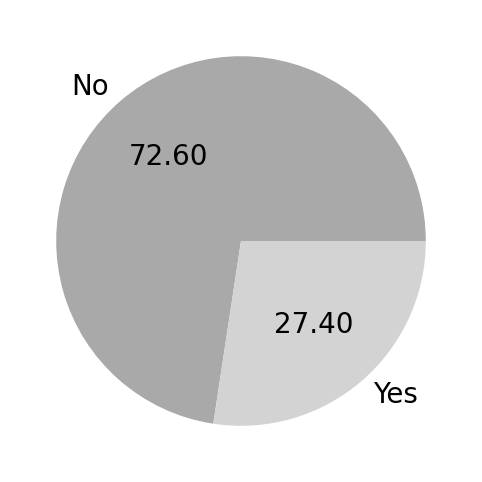

In [142]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
plt.pie(x=df["jundice"].value_counts(),labels=["No","Yes"],colors=["darkgray","lightgray"],autopct="%.2f")
plt.show()

In [143]:
df["jundice"].replace(to_replace=["no","yes"],value=[0,1],inplace=True)

In [144]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation,Class
0,1,1,0,0,1,1,0,1,0,0,6,0,0,5,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,0,0,5,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,0,0,5,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,1,1,4,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,0,1,10,Parent,YES


***Visualizing result column***

In [145]:
pos_result=df[df["result"]>=5]
neg_result=df[df["result"]<5]

In [146]:
print("positive results count is {}".format(len(pos_result)))
print("negative results count is {}".format(len(neg_result)))

positive results count is 888
negative results count is 280


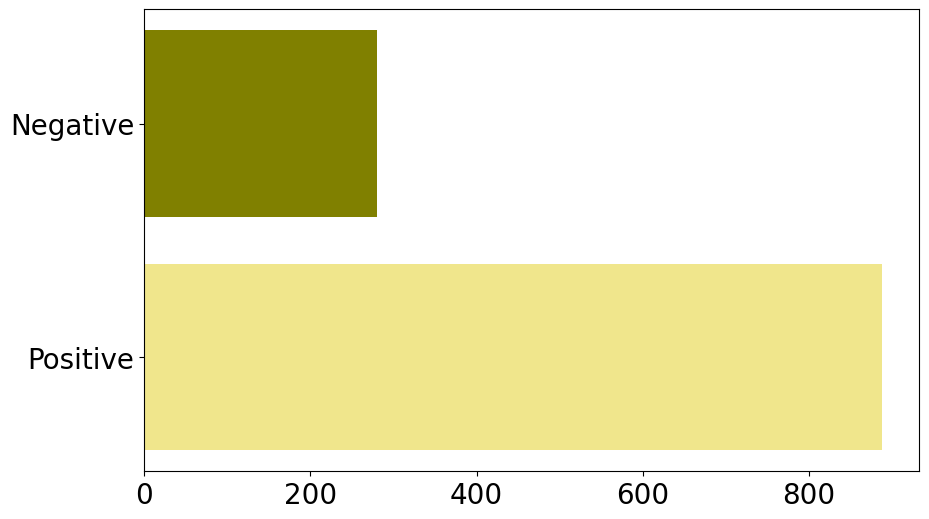

In [147]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
plt.barh(y=["Positive","Negative"],width=[len(pos_result),len(neg_result)],color=["khaki","olive"])
plt.show()

***visualizing Who completed the test column***

In [148]:
df["relation"].unique()

array(['Parent', '?', 'Self', 'Relative', 'Health care professional',
       'self'], dtype=object)

In [149]:
df["relation"].value_counts()

Parent                      856
?                           172
Relative                     68
Health care professional     52
Self                         16
self                          4
Name: relation, dtype: int64

In [150]:
df["relation"].replace(to_replace=["?","self"],value=["Parent","Self"],inplace=True)

In [151]:
df["relation"].value_counts()

Parent                      1028
Relative                      68
Health care professional      52
Self                          20
Name: relation, dtype: int64

In [152]:
df["relation"].replace(to_replace=["Parent","Relative","Health care professional","Self"],value=[0,1,2,3],inplace=True)

In [153]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation,Class
0,1,1,0,0,1,1,0,1,0,0,6,0,0,5,0,NO
1,1,1,0,0,1,1,0,1,0,0,6,0,0,5,0,NO
2,1,1,0,0,0,1,1,1,0,0,6,0,0,5,0,NO
3,0,1,0,0,1,1,0,0,0,1,5,1,1,4,0,NO
4,1,1,1,1,1,1,1,1,1,1,5,0,1,10,0,YES


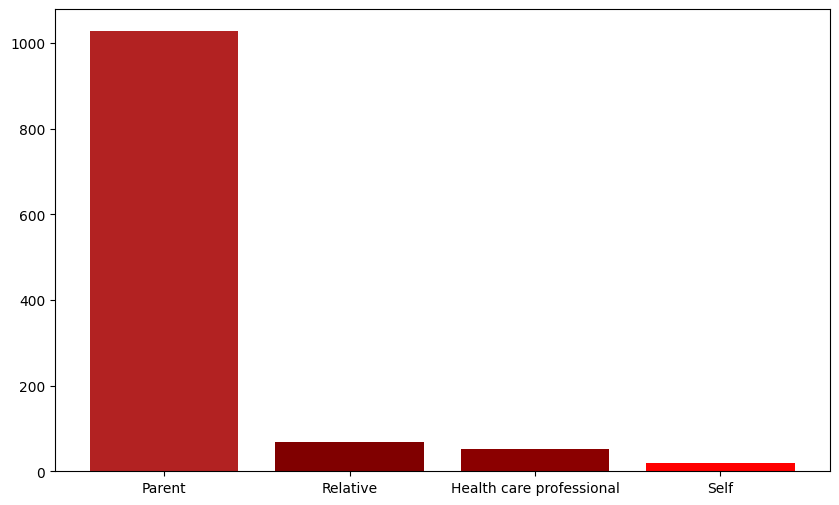

In [154]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=10
plt.bar(x=["Parent","Relative","Health care professional","Self"],height=df["relation"].value_counts(),color=["firebrick","maroon","darkred","red"])
plt.show()

***Analyzing and Visualizing Class column***

In [155]:
df["Class"].unique()

array(['NO', 'YES'], dtype=object)

In [156]:
df["Class"].value_counts()

NO     604
YES    564
Name: Class, dtype: int64

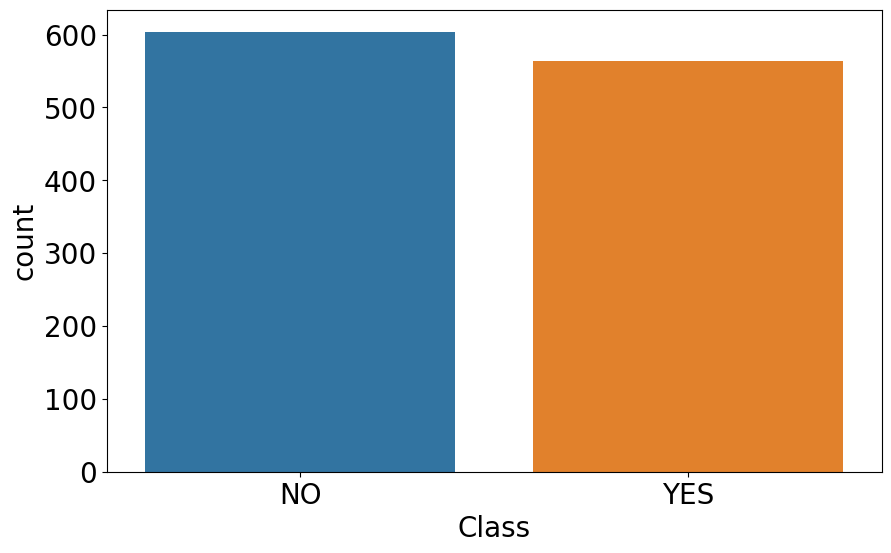

In [157]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
sns.countplot(x="Class",data=df)
plt.show()

In [158]:
df["Class"].replace(to_replace=["NO","YES"],value=[0,1],inplace=True)

In [159]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation,Class
0,1,1,0,0,1,1,0,1,0,0,6,0,0,5,0,0
1,1,1,0,0,1,1,0,1,0,0,6,0,0,5,0,0
2,1,1,0,0,0,1,1,1,0,0,6,0,0,5,0,0
3,0,1,0,0,1,1,0,0,0,1,5,1,1,4,0,0
4,1,1,1,1,1,1,1,1,1,1,5,0,1,10,0,1


In [160]:
df.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          0
gender       0
jundice      0
result       0
relation     0
Class        0
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   A1_Score   1168 non-null   int64 
 1   A2_Score   1168 non-null   int64 
 2   A3_Score   1168 non-null   int64 
 3   A4_Score   1168 non-null   int64 
 4   A5_Score   1168 non-null   int64 
 5   A6_Score   1168 non-null   int64 
 6   A7_Score   1168 non-null   int64 
 7   A8_Score   1168 non-null   int64 
 8   A9_Score   1168 non-null   int64 
 9   A10_Score  1168 non-null   int64 
 10  age        1168 non-null   object
 11  gender     1168 non-null   int64 
 12  jundice    1168 non-null   int64 
 13  result     1168 non-null   int64 
 14  relation   1168 non-null   int64 
 15  Class      1168 non-null   int64 
dtypes: int64(15), object(1)
memory usage: 146.1+ KB


In [162]:
df["age"].unique()

array(['6', '5', '4', '11', '10', '8', '7', '9', '?'], dtype=object)

In [163]:
df["age"].replace(to_replace="?",value="11",inplace=True)

In [164]:
df["age"].unique()

array(['6', '5', '4', '11', '10', '8', '7', '9'], dtype=object)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   A1_Score   1168 non-null   int64 
 1   A2_Score   1168 non-null   int64 
 2   A3_Score   1168 non-null   int64 
 3   A4_Score   1168 non-null   int64 
 4   A5_Score   1168 non-null   int64 
 5   A6_Score   1168 non-null   int64 
 6   A7_Score   1168 non-null   int64 
 7   A8_Score   1168 non-null   int64 
 8   A9_Score   1168 non-null   int64 
 9   A10_Score  1168 non-null   int64 
 10  age        1168 non-null   object
 11  gender     1168 non-null   int64 
 12  jundice    1168 non-null   int64 
 13  result     1168 non-null   int64 
 14  relation   1168 non-null   int64 
 15  Class      1168 non-null   int64 
dtypes: int64(15), object(1)
memory usage: 146.1+ KB


In [166]:
df["age"]=df["age"].astype(dtype="int64")

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   A1_Score   1168 non-null   int64
 1   A2_Score   1168 non-null   int64
 2   A3_Score   1168 non-null   int64
 3   A4_Score   1168 non-null   int64
 4   A5_Score   1168 non-null   int64
 5   A6_Score   1168 non-null   int64
 6   A7_Score   1168 non-null   int64
 7   A8_Score   1168 non-null   int64
 8   A9_Score   1168 non-null   int64
 9   A10_Score  1168 non-null   int64
 10  age        1168 non-null   int64
 11  gender     1168 non-null   int64
 12  jundice    1168 non-null   int64
 13  result     1168 non-null   int64
 14  relation   1168 non-null   int64
 15  Class      1168 non-null   int64
dtypes: int64(16)
memory usage: 146.1 KB


In [168]:
X=df.drop(labels="Class",axis=1)
y=df["Class"]

In [169]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation
0,1,1,0,0,1,1,0,1,0,0,6,0,0,5,0
1,1,1,0,0,1,1,0,1,0,0,6,0,0,5,0
2,1,1,0,0,0,1,1,1,0,0,6,0,0,5,0
3,0,1,0,0,1,1,0,0,0,1,5,1,1,4,0
4,1,1,1,1,1,1,1,1,1,1,5,0,1,10,0


In [170]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Class, dtype: int64

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [172]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(934, 15) (234, 15) (934,) (234,)


## Model-1 Support Vector Classifier

In [173]:
from sklearn.svm import SVC
svc_model=SVC(tol=50,kernel='linear')
svc_model.fit(X_train,y_train)

SVC(kernel='linear', tol=50)

In [174]:
svc_pred=svc_model.predict(X_test)

In [175]:
print(svc_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [176]:
Not_Autism=0
Autism=0
for predicted_label in svc_pred:
    if predicted_label==0:
        Not_Autism+=1
    else:
        Autism+=1
print(f"SupportVectorClassifier model predicted {Autism} samples as AUTISM and {Not_Autism} samples as NOT_AUTISM from {len(svc_pred)} test samples.")

SupportVectorClassifier model predicted 234 samples as AUTISM and 0 samples as NOT_AUTISM from 234 test samples.


## Result Analysis

***Accuracy Score***

In [177]:
svc_accuracy=accuracy_score(y_true=y_test,y_pred=svc_pred)
print("SupportVectorClassifier Accuracy is {:.2f}".format(svc_accuracy*100))

SupportVectorClassifier Accuracy is 41.45


***Classification Report***

In [178]:
print(classification_report(y_true=y_test,y_pred=svc_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00       137
         Yes       0.41      1.00      0.59        97

    accuracy                           0.41       234
   macro avg       0.21      0.50      0.29       234
weighted avg       0.17      0.41      0.24       234



***Confusion Matrix***

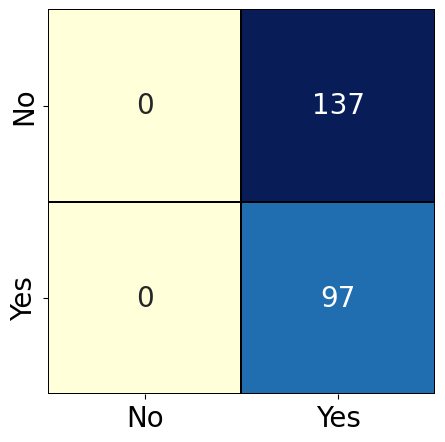

In [179]:
plt.figure(figsize=(5,5))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=svc_pred),
            cbar=False,
            annot=True,
            fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="YlGnBu",
            linecolor="black",
            linewidths=0.2)
plt.show()

## Model Saving

In [180]:
with open(file="SVM_model_Child.pkl",mode="wb") as file:
    pickle.dump(obj=svc_model,file=file)

## Model-2 RandomForestClassifier

In [181]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=1,min_samples_split=20,min_samples_leaf=20)
RF_model.fit(X=X_train,y=y_train)

RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,
                       n_estimators=1)

In [182]:
RF_pred=RF_model.predict(X=X_test)

In [183]:
print(RF_pred)

[0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0
 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0
 1 0 1 1 0 1 1 0 1 0 1 0]


In [184]:
Not_Autism=0
Autism=0
for predicted_label in RF_pred:
    if predicted_label==0:
        Not_Autism+=1
    else:
        Autism+=1
print(f"RandomForestClassifier model predicted {Autism} samples as AUTISM and {Not_Autism} samples as NOT_AUTISM from {len(RF_pred)} test samples.")

RandomForestClassifier model predicted 101 samples as AUTISM and 133 samples as NOT_AUTISM from 234 test samples.


### Result Analysis

***Accuracy Score***

In [185]:
RF_accuracy=accuracy_score(y_true=y_test,y_pred=RF_pred)
print("RandomForestClassifier accuracy is {:.2f}".format(RF_accuracy*100))

RandomForestClassifier accuracy is 86.32


***Classification Report***

In [186]:
print(classification_report(y_true=y_test,y_pred=RF_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       0.89      0.87      0.88       137
         Yes       0.82      0.86      0.84        97

    accuracy                           0.86       234
   macro avg       0.86      0.86      0.86       234
weighted avg       0.86      0.86      0.86       234



***Confusion Matrix***

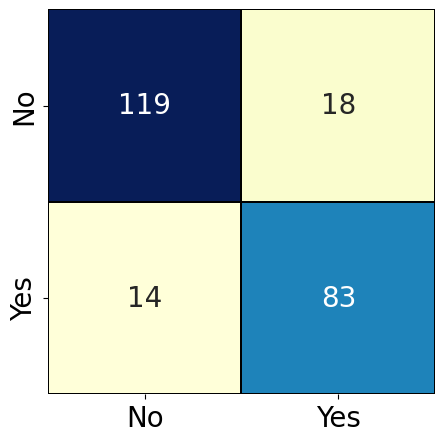

In [187]:
plt.figure(figsize=(5,5))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=RF_pred),
            cbar=False,
            annot=True,
            fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="YlGnBu",
            linecolor="black",
            linewidths=0.2)
plt.show()

In [188]:
with open(file="RF_model_Child.pkl",mode="wb") as file:
    pickle.dump(obj=RF_model,file=file)

## Model-3 ANN(Artificial Neural Network)

In [189]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import optimizers

In [190]:
hidden_units=100
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=20

In [191]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=15, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

In [192]:
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])

In [193]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1600      
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,801
Trainable params: 11,801
Non-trainable params: 0
_________________________________________________________________


In [194]:
history=model.fit(x=X_train,y=y_train,epochs=no_epochs, batch_size=128,validation_data=(X_test,y_test))

Epoch 1/20
8/8 [==============================] - 1s 34ms/step - loss: 0.6211 - accuracy: 0.6916 - val_loss: 0.4891 - val_accuracy: 0.8034
Epoch 2/20
8/8 [==============================] - 0s 10ms/step - loss: 0.4537 - accuracy: 0.7923 - val_loss: 0.3934 - val_accuracy: 0.8248
Epoch 3/20
8/8 [==============================] - 0s 8ms/step - loss: 0.3914 - accuracy: 0.8212 - val_loss: 0.3473 - val_accuracy: 0.8632
Epoch 4/20
8/8 [==============================] - 0s 8ms/step - loss: 0.3415 - accuracy: 0.8555 - val_loss: 0.3062 - val_accuracy: 0.8889
Epoch 5/20
8/8 [==============================] - 0s 10ms/step - loss: 0.2995 - accuracy: 0.8897 - val_loss: 0.2689 - val_accuracy: 0.9017
Epoch 6/20
8/8 [==============================] - 0s 12ms/step - loss: 0.2622 - accuracy: 0.9090 - val_loss: 0.2456 - val_accuracy: 0.9017
Epoch 7/20
8/8 [==============================] - 0s 9ms/step - loss: 0.2342 - accuracy: 0.9208 - val_loss: 0.2200 - val_accuracy: 0.9103
Epoch 8/20
8/8 [==============

## Model Accuracy and Loss Plot-Graphs

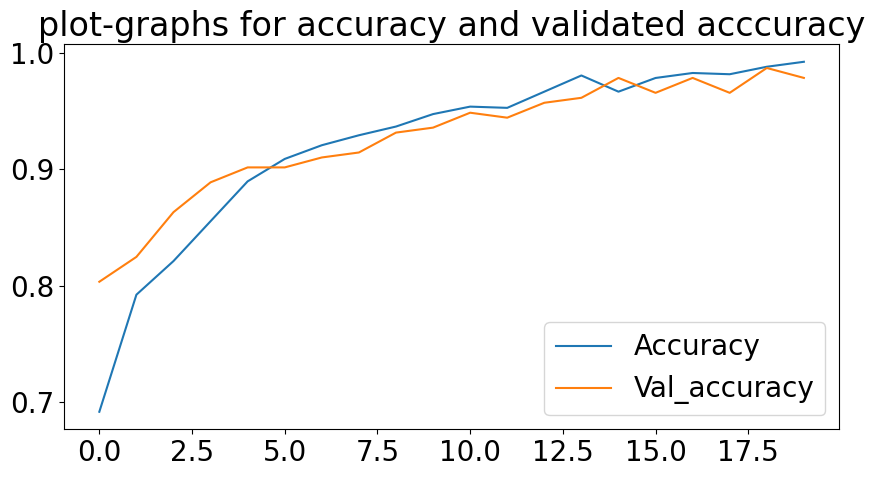

In [195]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(label="plot-graphs for accuracy and validated acccuracy")
plt.legend(["Accuracy","Val_accuracy"])
plt.show()

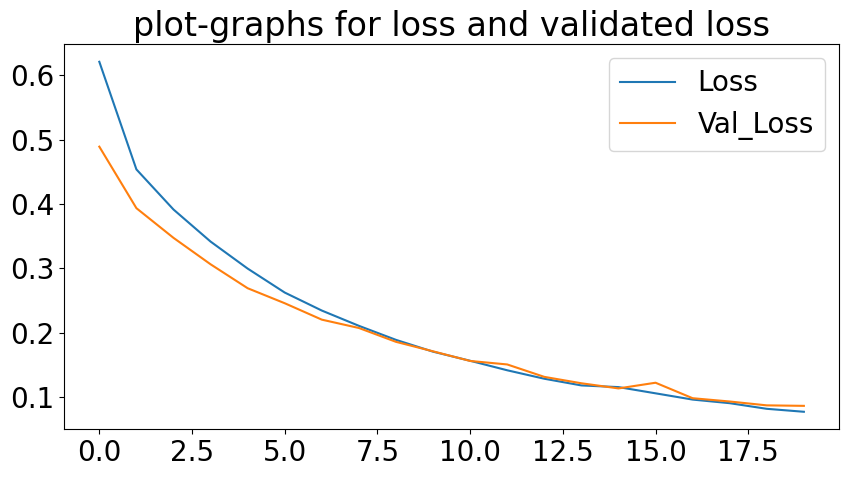

In [196]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title(label="plot-graphs for loss and validated loss")
plt.legend(["Loss","Val_Loss"])
plt.show()

## Model Saving

In [197]:
model.save("ANN_model_Child.h5")

In [198]:
ann_pred=model.predict(x=X_test,batch_size=10,verbose=1)

24/24 [==============================] - 0s 2ms/step


In [199]:
print(ann_pred)

[[9.56611991e-01]
 [2.91441053e-01]
 [9.68173742e-01]
 [8.47903043e-02]
 [9.94606912e-01]
 [3.67037894e-04]
 [9.04860675e-01]
 [8.57839063e-02]
 [9.45265114e-01]
 [2.91635748e-04]
 [1.75561551e-02]
 [6.70942524e-03]
 [9.82841448e-05]
 [9.75918055e-01]
 [5.13483246e-04]
 [1.99460756e-05]
 [3.82903590e-06]
 [9.99078631e-01]
 [1.27902720e-02]
 [9.99078631e-01]
 [3.15790892e-01]
 [9.96139765e-01]
 [3.80618572e-02]
 [8.27928185e-02]
 [2.21004505e-02]
 [1.90124899e-01]
 [1.18924054e-05]
 [9.77654517e-01]
 [9.93113041e-01]
 [6.22593284e-01]
 [2.11197155e-04]
 [9.97967005e-01]
 [9.87495601e-01]
 [7.88355708e-01]
 [7.80013943e-05]
 [8.70628178e-01]
 [2.25381613e-01]
 [5.13483246e-04]
 [1.88038219e-04]
 [9.50029075e-01]
 [6.36360824e-01]
 [1.99460756e-05]
 [9.93113041e-01]
 [6.50381902e-04]
 [7.53577380e-03]
 [3.50235382e-06]
 [8.47903043e-02]
 [9.35677767e-01]
 [9.99579132e-01]
 [6.87285885e-03]
 [1.08084701e-01]
 [9.97509003e-01]
 [8.47903043e-02]
 [1.78312545e-03]
 [9.92834866e-01]
 [6.077317

In [200]:
rounded = [int(round(x[0])) for x in ann_pred]
print(rounded)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]


In [201]:
y_true=list(y_test)

In [202]:
print(y_true)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]


In [203]:
Not_Autism=0
Autism=0
for predicted_label in rounded :
    if predicted_label==0:
        Not_Autism+=1
    else:
        Autism+=1
print(f"ArtificialNeuralNetwork model predicted {Autism} samples as AUTISM and {Not_Autism} samples as NOT_AUTISM from {len(rounded )} test samples.")

ArtificialNeuralNetwork model predicted 102 samples as AUTISM and 132 samples as NOT_AUTISM from 234 test samples.


## Result Analysis

***Accuracy Score***

In [204]:
ann_accuracy=accuracy_score(y_true=y_true,y_pred=rounded)
print("ANN Accuracy is {:.2f}".format(ann_accuracy*100))

ANN Accuracy is 97.86


***Classification Report***

In [205]:
print(classification_report(y_true=y_true,y_pred=rounded,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       1.00      0.96      0.98       137
         Yes       0.95      1.00      0.97        97

    accuracy                           0.98       234
   macro avg       0.98      0.98      0.98       234
weighted avg       0.98      0.98      0.98       234



***Confusion Matrix***

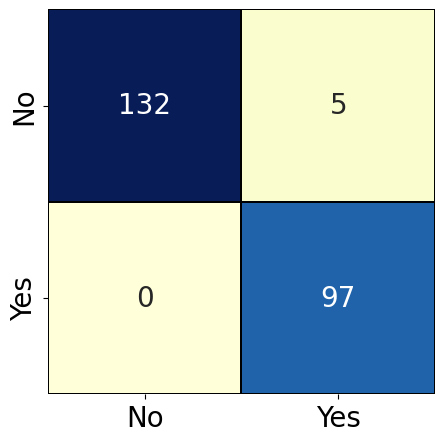

In [206]:
plt.figure(figsize=(5,5))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_true,y_pred=rounded),
            cbar=False,
            annot=True,
            fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="YlGnBu",
            linecolor="black",
            linewidths=0.2)
plt.show()

## Accuracy Comparision for Toddler Dataset

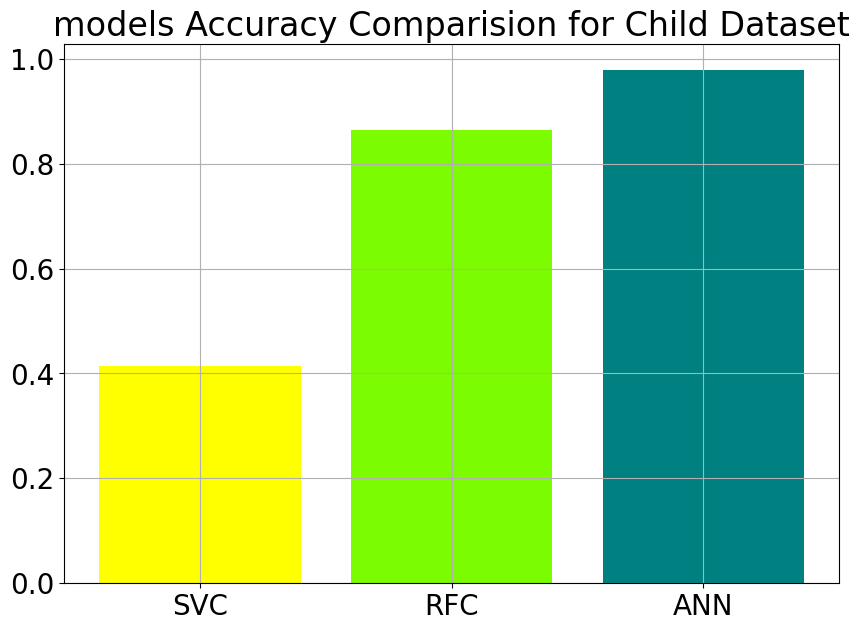

In [207]:
data=[svc_accuracy,RF_accuracy,ann_accuracy]
labels=["SVC","RFC","ANN"]
colors=["yellow","lawngreen","teal"]
plt.figure(figsize=(10,7))
plt.grid()
plt.bar(x=labels,height=data,color=colors)
plt.title(label="models Accuracy Comparision for Child Dataset")
plt.show()

##Comparartive Analysis

In [208]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [209]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(817, 15) (351, 15) (817,) (351,)


## Model-1 Support Vector Classifier

In [210]:
from sklearn.svm import SVC
svc_model=SVC(tol=50,kernel='linear')
svc_model.fit(X_train,y_train)

SVC(kernel='linear', tol=50)

In [211]:
svc_pred=svc_model.predict(X_test)

In [212]:
print(svc_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [213]:
Not_Autism=0
Autism=0
for predicted_label in svc_pred:
    if predicted_label==0:
        Not_Autism+=1
    else:
        Autism+=1
print(f"SupportVectorClassifier model predicted {Autism} samples as AUTISM and {Not_Autism} samples as NOT_AUTISM from {len(svc_pred)} test samples.")

SupportVectorClassifier model predicted 351 samples as AUTISM and 0 samples as NOT_AUTISM from 351 test samples.


## Result Analysis

***Accuracy Score***

In [214]:
svc_accuracy2=accuracy_score(y_true=y_test,y_pred=svc_pred)
print("SupportVectorClassifier Accuracy is {:.2f}".format(svc_accuracy*100))

SupportVectorClassifier Accuracy is 41.45


***Classification Report***

In [215]:
print(classification_report(y_true=y_test,y_pred=svc_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00       196
         Yes       0.44      1.00      0.61       155

    accuracy                           0.44       351
   macro avg       0.22      0.50      0.31       351
weighted avg       0.20      0.44      0.27       351



***Confusion Matrix***

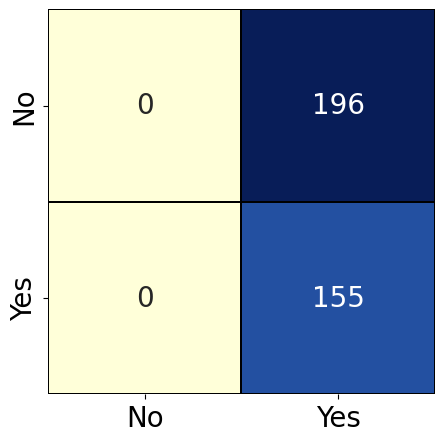

In [216]:
plt.figure(figsize=(5,5))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=svc_pred),
            cbar=False,
            annot=True,
            fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="YlGnBu",
            linecolor="black",
            linewidths=0.2)
plt.show()

## Model Saving

In [217]:
with open(file="SVM_model_Child.pkl",mode="wb") as file:
    pickle.dump(obj=svc_model,file=file)

## Model-2 RandomForestClassifier

In [218]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=1,min_samples_split=20,min_samples_leaf=20)
RF_model.fit(X=X_train,y=y_train)

RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,
                       n_estimators=1)

In [219]:
RF_pred=RF_model.predict(X=X_test)

In [220]:
print(RF_pred)

[0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0
 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1
 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1
 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1]


In [221]:
Not_Autism=0
Autism=0
for predicted_label in RF_pred:
    if predicted_label==0:
        Not_Autism+=1
    else:
        Autism+=1
print(f"RandomForestClassifier model predicted {Autism} samples as AUTISM and {Not_Autism} samples as NOT_AUTISM from {len(RF_pred)} test samples.")

RandomForestClassifier model predicted 152 samples as AUTISM and 199 samples as NOT_AUTISM from 351 test samples.


### Result Analysis

***Accuracy Score***

In [222]:
RF_accuracy2=accuracy_score(y_true=y_test,y_pred=RF_pred)
print("RandomForestClassifier accuracy is {:.2f}".format(RF_accuracy*100))

RandomForestClassifier accuracy is 86.32


***Classification Report***

In [223]:
print(classification_report(y_true=y_test,y_pred=RF_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       0.85      0.86      0.86       196
         Yes       0.82      0.81      0.81       155

    accuracy                           0.84       351
   macro avg       0.84      0.83      0.84       351
weighted avg       0.84      0.84      0.84       351



***Confusion Matrix***

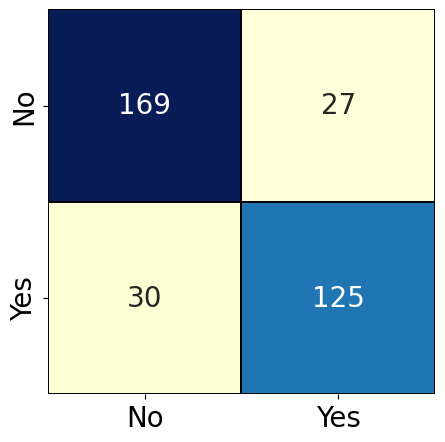

In [224]:
plt.figure(figsize=(5,5))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=RF_pred),
            cbar=False,
            annot=True,
            fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="YlGnBu",
            linecolor="black",
            linewidths=0.2)
plt.show()

In [225]:
with open(file="RF_model_Child.pkl",mode="wb") as file:
    pickle.dump(obj=RF_model,file=file)

## Model-3 ANN(Artificial Neural Network)

In [226]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import optimizers

In [227]:
hidden_units=100
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=20

In [228]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=15, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

In [229]:
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])

In [230]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               1600      
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,801
Trainable params: 11,801
Non-trainable params: 0
_________________________________________________________________


In [231]:
history=model.fit(x=X_train,y=y_train,epochs=no_epochs, batch_size=128,validation_data=(X_test,y_test))

Epoch 1/20
7/7 [==============================] - 1s 44ms/step - loss: 0.6370 - accuracy: 0.6034 - val_loss: 0.5142 - val_accuracy: 0.7692
Epoch 2/20
7/7 [==============================] - 0s 11ms/step - loss: 0.4968 - accuracy: 0.7760 - val_loss: 0.4470 - val_accuracy: 0.7493
Epoch 3/20
7/7 [==============================] - 0s 12ms/step - loss: 0.4405 - accuracy: 0.7528 - val_loss: 0.3941 - val_accuracy: 0.8205
Epoch 4/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3883 - accuracy: 0.8237 - val_loss: 0.3574 - val_accuracy: 0.8519
Epoch 5/20
7/7 [==============================] - 0s 14ms/step - loss: 0.3416 - accuracy: 0.8592 - val_loss: 0.3286 - val_accuracy: 0.8803
Epoch 6/20
7/7 [==============================] - 0s 16ms/step - loss: 0.3092 - accuracy: 0.8837 - val_loss: 0.3028 - val_accuracy: 0.8860
Epoch 7/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2817 - accuracy: 0.8972 - val_loss: 0.2818 - val_accuracy: 0.8889
Epoch 8/20
7/7 [===========

## Model Accuracy and Loss Plot-Graphs

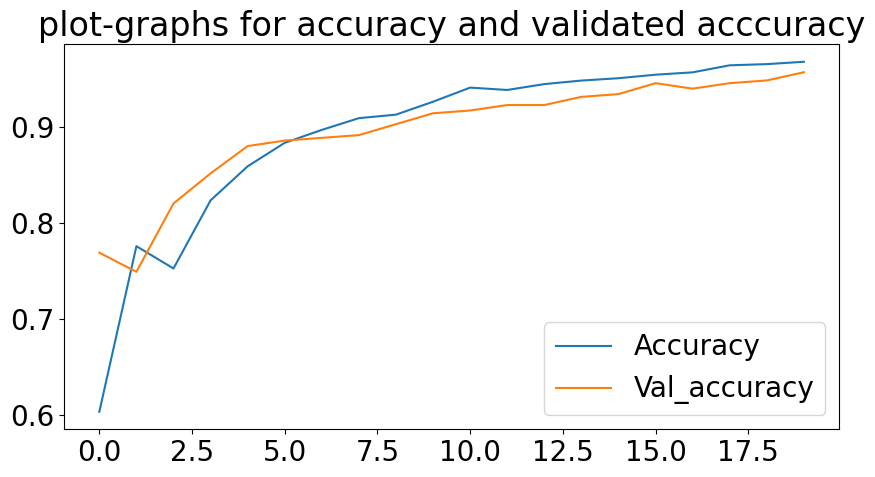

In [232]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(label="plot-graphs for accuracy and validated acccuracy")
plt.legend(["Accuracy","Val_accuracy"])
plt.show()

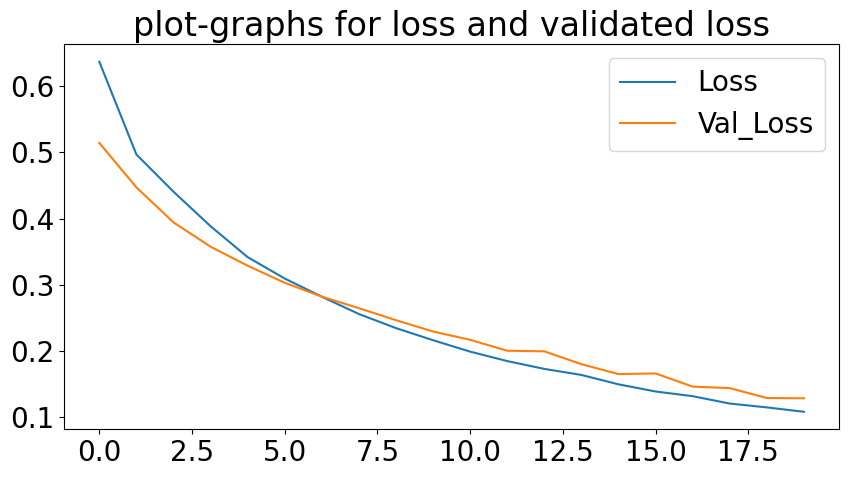

In [233]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title(label="plot-graphs for loss and validated loss")
plt.legend(["Loss","Val_Loss"])
plt.show()

## Model Saving

In [234]:
model.save("ANN_model_Child.h5")

In [235]:
ann_pred=model.predict(x=X_test,batch_size=10,verbose=1)

36/36 [==============================] - 0s 1ms/step


In [236]:
print(ann_pred)

[[9.27536488e-01]
 [4.05531973e-01]
 [9.56868768e-01]
 [1.20225094e-01]
 [9.85433400e-01]
 [2.02926947e-03]
 [8.98801088e-01]
 [9.28417593e-02]
 [9.31762874e-01]
 [1.22272875e-03]
 [7.02306405e-02]
 [1.17820827e-02]
 [4.26208251e-04]
 [9.48747993e-01]
 [2.02716235e-03]
 [9.24007836e-05]
 [1.73524641e-05]
 [9.95216548e-01]
 [2.05036644e-02]
 [9.95216548e-01]
 [5.80331624e-01]
 [9.89069045e-01]
 [7.97129944e-02]
 [1.23164125e-01]
 [3.12674008e-02]
 [1.72417223e-01]
 [2.40049158e-05]
 [9.49683368e-01]
 [9.84179914e-01]
 [6.07446611e-01]
 [6.57328754e-04]
 [9.92414415e-01]
 [9.69022930e-01]
 [7.06193388e-01]
 [3.41907959e-04]
 [8.50410998e-01]
 [2.49910310e-01]
 [2.02716235e-03]
 [5.02171984e-04]
 [9.31775570e-01]
 [5.51446676e-01]
 [9.24007836e-05]
 [9.84179914e-01]
 [2.70688161e-03]
 [1.12220673e-02]
 [1.53416077e-05]
 [1.20225094e-01]
 [8.73421371e-01]
 [9.97922063e-01]
 [2.47615501e-02]
 [1.91269219e-01]
 [9.93288696e-01]
 [1.20225094e-01]
 [8.42394307e-03]
 [9.78155792e-01]
 [2.617674

In [237]:
rounded = [int(round(x[0])) for x in ann_pred]
print(rounded)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 

In [238]:
y_true=list(y_test)

In [239]:
print(y_true)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 

In [240]:
Not_Autism=0
Autism=0
for predicted_label in rounded :
    if predicted_label==0:
        Not_Autism+=1
    else:
        Autism+=1
print(f"ArtificialNeuralNetwork model predicted {Autism} samples as AUTISM and {Not_Autism} samples as NOT_AUTISM from {len(rounded )} test samples.")

ArtificialNeuralNetwork model predicted 170 samples as AUTISM and 181 samples as NOT_AUTISM from 351 test samples.


## Result Analysis

***Accuracy Score***

In [241]:
ann_accuracy2=accuracy_score(y_true=y_true,y_pred=rounded)
print("ANN Accuracy is {:.2f}".format(ann_accuracy*100))

ANN Accuracy is 97.86


***Classification Report***

In [242]:
print(classification_report(y_true=y_true,y_pred=rounded,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       1.00      0.92      0.96       196
         Yes       0.91      1.00      0.95       155

    accuracy                           0.96       351
   macro avg       0.96      0.96      0.96       351
weighted avg       0.96      0.96      0.96       351



***Confusion Matrix***

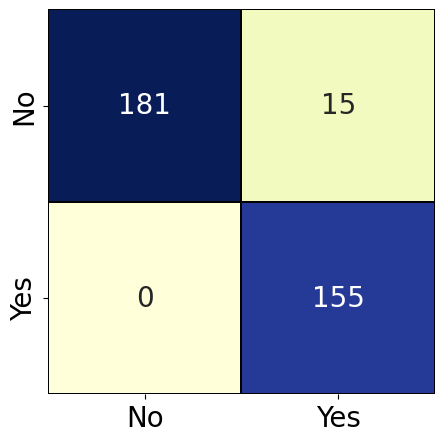

In [243]:
plt.figure(figsize=(5,5))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_true,y_pred=rounded),
            cbar=False,
            annot=True,
            fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="YlGnBu",
            linecolor="black",
            linewidths=0.2)
plt.show()

## Accuracy Comparision for Child Dataset

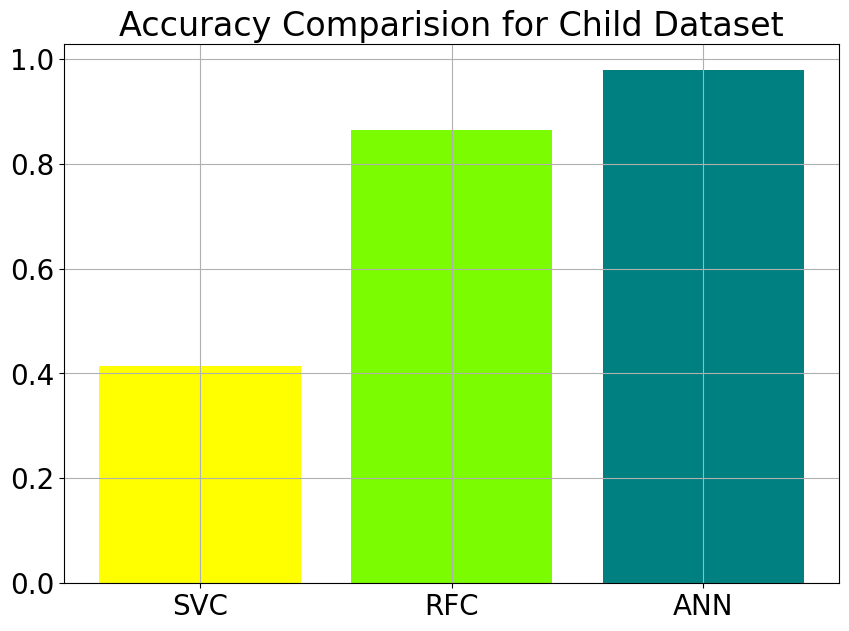

In [244]:
data=[svc_accuracy,RF_accuracy,ann_accuracy]
labels=["SVC","RFC","ANN"]
colors=["yellow","lawngreen","teal"]
plt.figure(figsize=(10,7))
plt.grid()
plt.bar(x=labels,height=data,color=colors)
plt.title(label="Accuracy Comparision for Child Dataset")
plt.show()

## Accuracy Comparision for different test size of Child Dataset

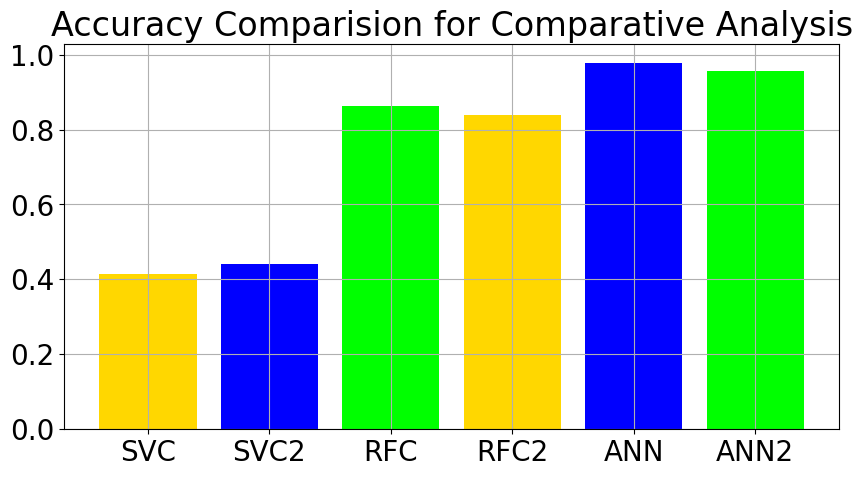

In [245]:
data=[svc_accuracy,svc_accuracy2,RF_accuracy,RF_accuracy2,ann_accuracy,ann_accuracy2]
labels=["SVC","SVC2","RFC","RFC2","ANN","ANN2"]
colors=["gold","blue","lime"]
plt.figure(figsize=(10,5))
plt.grid()
plt.bar(x=labels,height=data,color=colors)
plt.title(label="Accuracy Comparision for Comparative Analysis")
plt.show()

In [246]:
print("Middle aged adults with autism are 2.6 times more likely to be diagnosed with Alzheimer's disease")

Middle aged adults with autism are 2.6 times more likely to be diagnosed with Alzheimer's disease
